In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

1. Introduction to Validation Metrics:
Validation metrics are used to evaluate the performance of machine learning models. In imbalanced datasets, where one class significantly outnumbers the other(s), traditional metrics like accuracy may not be informative. Therefore, specialized metrics are necessary to assess a model's performance in such scenarios.

2. Handling Imbalanced Datasets:
Before diving into metrics, let's briefly discuss techniques for handling imbalanced datasets:

> Resampling: You can oversample the minority class, undersample the majority class, or use synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique).

> Different Algorithms: Some algorithms, like ensemble methods (Random Forest, Gradient Boosting), handle imbalanced data better.

> Cost-Sensitive Learning: Modify the algorithm's cost function to penalize misclassifying the minority class more.

3. Common Validation Metrics for Imbalanced Datasets:
Here are some common validation metrics for imbalanced datasets:

> Accuracy:
> Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. It's not suitable for imbalanced datasets.

> Precision:
> Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions made by the model. Precision focuses on the predicted positive instances and indicates how many of them are actually relevant. A high precision value means that the model has fewer false positives.

> Recall:
> Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It measures the ability of the model to capture all the relevant instances of the positive class. Recall is sensitive to false negatives, so a high recall value indicates that the model is good at identifying positive instances, but it may have more false positives.

> F1-Score:
> The F1-Score is the harmonic mean of precision and recall and is especially useful when you want to balance precision and recall.

> Area Under the Receiver Operating Characteristic (ROC-AUC):
ROC-AUC measures the area under the Receiver Operating Characteristic curve and helps evaluate the model's ability to distinguish between classes.

> Area Under the Precision-Recall Curve (PR AUC):
PR AUC calculates the area under the Precision-Recall curve and is useful when you care more about the minority class's performance.




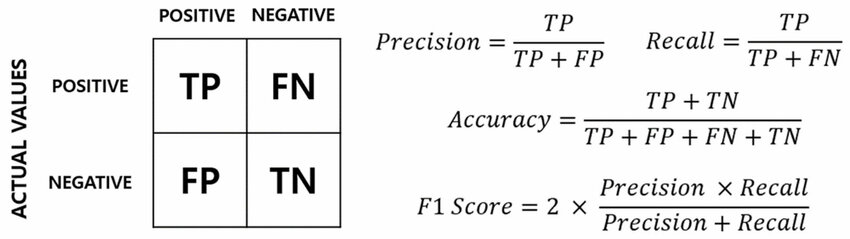




4. Implementation and Example:
Let's implement these metrics using Python and scikit-learn on an imbalanced dataset. We'll use the famous "Breast Cancer" dataset from scikit-learn:



In [2]:

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


In [3]:

# Load the breast cancer datasetcol
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (use 20% testing split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-Score: 0.97
ROC-AUC: 0.96
Precision-Recall AUC: 0.95


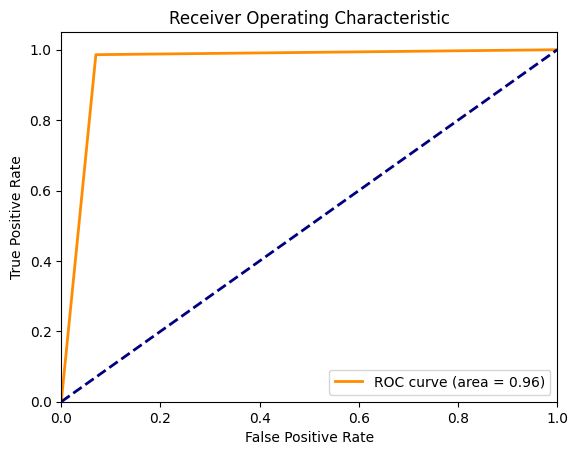

In [4]:

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate validation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision_recall_auc = average_precision_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Precision-Recall AUC: {precision_recall_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



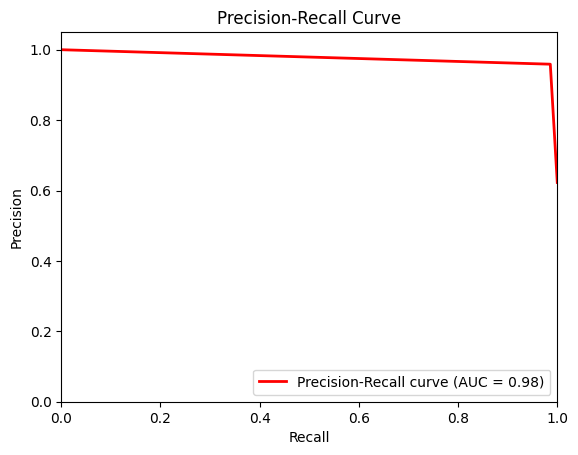

In [15]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
precision_recall_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % precision_recall_auc)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

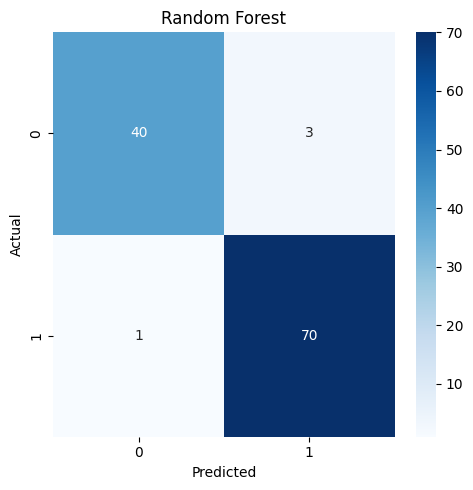

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrices for the RF model
cm_rf = confusion_matrix(y_test, y_pred)

# Set up the figure suize using subplots
fig, axes = plt.subplots(figsize=(5, 5))

# Create a heatmap for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Random Forest')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

plt.tight_layout()
plt.show()
